In [3]:
 # import libraries
import numpy as  np
import pandas as pd
import  array
import matplotlib.pyplot as plt
import importlib.util
from matplotlib.colors import ListedColormap
import array
import sklearn
import pickle
from sklearn.metrics import confusion_matrix
import warnings
import csv
warnings.filterwarnings('ignore')

In [4]:
# importing template file 
spec = importlib.util.spec_from_file_location("Template", "/home/admin1/PycharmProjects/Basic Python/myprograms/WEEK_10/UtilityTemplate/UtilTemplate.py")
foo = importlib.util.module_from_spec(spec)
spec.loader.exec_module(foo)
# creating object of Template class
log_template = foo.Template()

In [5]:
# load dataset
test_dataset = log_template.read_csv('CSV_Files/test.csv')
print("Dataset has {} rows and {} Columns".format(test_dataset.shape[0],test_dataset.shape[1])) 

Dataset has 80 rows and 5 Columns


In [6]:
# load model training
file = open('Pickle File/TrainPickle.pkl', 'rb')
classifier = pickle.load(file)
scale = pickle.load(file)

In [7]:
# seperating feature and label of test data
x_test = test_dataset.iloc[:,[2,3]].values
y_test = test_dataset.iloc[:,4].values

In [9]:
# tranform test data using scaling object
x_test = scale.transform(x_test)

In [10]:
# prediction on model by test data
prediction =  log_template.prediction_classifier(x_test, classifier)

In [11]:
# confusion matrix for describe performance of classification model
cfm_test = sklearn.metrics.confusion_matrix(y_test,prediction)

'c' argument looks like a single numeric RGB or RGBA sequence, which should be avoided as value-mapping will have precedence in case its length matches with 'x' & 'y'.  Please use a 2-D array with a single row if you really want to specify the same RGB or RGBA value for all points.
'c' argument looks like a single numeric RGB or RGBA sequence, which should be avoided as value-mapping will have precedence in case its length matches with 'x' & 'y'.  Please use a 2-D array with a single row if you really want to specify the same RGB or RGBA value for all points.


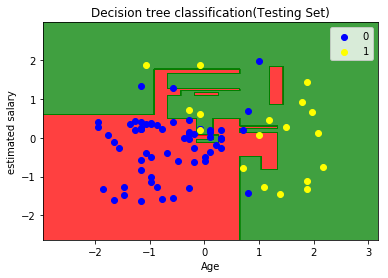

In [12]:
# visualization of testing data
x1,x2=np.meshgrid(np.arange(start=x_test[:,0].min()-1,stop=x_test[:,0].max()+1,step=0.01),np.arange(start=x_test[:,1].min()-1,stop=x_test[:,1].max()+1,step=0.01 ))
plt.contourf(x1,x2,classifier.predict(np.array([x1.ravel(),x2.ravel()]).T).reshape(x1.shape),alpha=0.75,cmap=ListedColormap(('red','green')))

# limit the age and salary         
plt.xlim(x1.min(),x1.max())
plt.ylim(x2.min(),x2.max())

# plots all the datapoints in graph         
for i,j in enumerate(np.unique(y_test)):
    plt.scatter(x_test[y_test==j,0],x_test[y_test==j,1], c=ListedColormap(('blue','yellow'))(i),label=j)

plt.title('Decision tree classification(Testing Set)')
plt.xlabel('Age')
plt.ylabel('estimated salary')
plt.legend()
plt.show()

In [13]:
# get accuracy
accuracy =  sklearn.metrics.balanced_accuracy_score(y_test,prediction)*100
print("Test Accuracy:",accuracy)

Test Accuracy: 89.15770609318996
